In [ ]:
import imageio as iio
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


!wget https://upload.wikimedia.org/wikipedia/commons/d/dd/Forest-House.jpg

--2022-01-29 10:24:32--  https://upload.wikimedia.org/wikipedia/commons/d/dd/Forest-House.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246534 (241K) [image/jpeg]
Saving to: ‘Forest-House.jpg.1’

Forest-House.jpg.1  100%[===================>] 240.76K  1.30MB/s    in 0.2s    

2022-01-29 10:24:32 (1.30 MB/s) - ‘Forest-House.jpg.1’ saved [246534/246534]



In [ ]:
im = iio.imread("Forest-House.jpg")
im = np.array(im)
im=np.sum(im,axis=2)/3
im.shape

(436, 658)

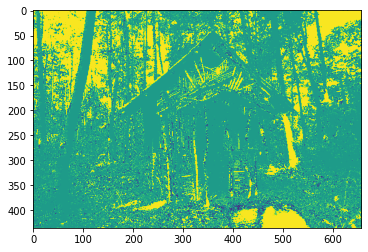

In [ ]:
#compress the image by clustering in N regions
num_clusters=32
cent= np.random.randint(0,255,num_clusters)
num_it=3

for i in range(num_it):
  diff=[]
  for c in cent:
    diff.append((im-c)**2)

  diff=np.array(diff)
  ind=np.argmin(diff,axis=0)
  cent_new=[]
  for ii in ind:
    cnew=np.sum((im*(ind==ii)))/np.sum(ind==ii)
    cent_new.append(cnew)

  cent=np.array(cent_new)





plt.imshow(ind)

In [ ]:
plt.imshow(cent[ind])

In [ ]:
#im ---> (436,658). cent---->(5) 

In [ ]:
x=np.array([[1,0],[0,1]])
print(x)

#x---> substract 1, 2, 3, 4, 100

[[1 0]
 [0 1]]


In [ ]:
y=np.arange(100)+1
print(y)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [ ]:
z=x[:,:,np.newaxis] - y[np.newaxis, np.newaxis, :]

print(z.shape)

(2, 2, 100)


In [ ]:
z[:,:,2]

array([[-2, -3],
       [-3, -2]])